# Predição de índice de satisfação de um colaborador

### [Danilo Gustavo Bispo]

## Conteúdo

1. [Introdução](#Introdução)

2. [Licença](#Licença)

3. [A problematização de negócio](#A-problematização-de-negócio)

4. [Checando os dados](#Checando-os-dados)

5. [Análise exploratória](#Análise-exploratória)

6. [Limpeza dos dados](#Limpeza-dos-dados)

7. [Criação do modelo](#Criação-do-modelo)

## Introdução

[[ voltar_ao topo ]](#Conteúdo)

Neste notebook será apresentado um pipeline básico de análise de dados no intuito de representar um típico workflow de projeto em ciência de dados.

Além de oferecer o código, a idéia é demonstrar um conjunto de boas práticas na tentativa de tornar o exemplo mais eficaz e colaborativo junto à comunidade de cientistas de dados. 

Será seguido o checklist do livro [The Elements of Data Analytic Style](https://leanpub.com/datastyle). Um guia rápido e gratuito para realização de análises de dados.

## Licença

[[ voltar ao topo ]](#Conteúdo)

No geral este material está disponibilizado para que seja utilizado e compartilhado de maneira plena.

## A problematização de negócio

[[ voltar ao topo ]](#Conteúdo)

Um grande desafio para o departamento de recursos humanos de grande parte das empresas é manter o equilibrio na obtenção de novos talentos. Contratação e retenção de colaboradores são tarefas extremamente complexas que requerem capital, tempo e habilidades. De acordo com site [toggl](https://toggl.com/blog/cost-of-hiring-an-employe) as empresas gastam cerca 40% de suas horas de trabalho em tarefas que não geram renda, como por exemplo a contratação. Além disso gastam de 15% a 20% do salário de um profissional de RH para recrutar um novo candidato. Em média uma empresa perde entre 1% e 2,5% de sua receita total no tempo necessário para realizar uma nova contratação, algo que leva em torno de aproximadamente 50 dias para conseguir preencher uma posição.

Uma das possibilidades de tentar diminuir os custos seria manter os colaboradores que já estão compondo o quadro da empresa diminuindo a necessidade realizar novas contratações. Para isso o time de recursos humanos teria que dispor de uma ferramenta capaz de demonstrar o grau de satisfação e a chance que um colaborador tem de permanecer ou não empresa.

Levando em consideração que a equipe de RH coleta uma extensão de dados sobre seus funcionários, a ideia consiste em desenvolver um modelo que possa prever quais funcionários têm maior probabilidade de deixar o quadro da empresa. 


O princial objetivo deste projeto será  responder a seguintes questões:

* Como identificar as principais variáveis que mais tem chance de afetar o grau de safistação do colaborador em relação empresa?
* Existem padrões de comportamento em relação a colaboradores específicos e como isso se traduz em desequilíbrios ou permanência no quadro da empresa?
* É possível integrar essas variáveis explicativas e esses padrões um algoritmo preditivo que seja capaz de indicar a saída de um colaborador em um futuro próximo? Se sim, qual forma e estrutura este algoritmo deve assumir?


## Checando os dados

[[ voltar ao topo ]](#Conteúdo)

O próximo passo consiste em lançar uma visão sobre os dados com os quais se pretende trabalhar. Considerando que por mais aparentemente acurado os dados possam parecer estar, eles podem conter erros, portanto torna-se importante pontuar os erros antes de iniciar o processo de análise.

Por exemplo, as considerações servem para responder as seguintes questões:

* Existe algo de errado com os dados?
* Existe alguma peculiaridade com os dados?
* Será preciso corrigir ou remover algo relacionado aos dados?



In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [5]:
colaborador_df = pd.read_csv('RH.csv')
colaborador_df.head()

,Idade,Desligado,ViagemTrabalho,ValorDiario,Departamento,DistanciaTrabalho,NivelEducacao,AreaEducacao,ContagemEmprego,NumeroFuncionarios,...,SatisfacaoRelacionamento,HorasPadrao,NivelOpcoesAcoes,AnosTrabalhado,TempoTreinamento,EquilibrioVidaProfissional,AnosDeEmpresa,AnosFuncaoAtual,AnosUltimaPromocao,AnosGerenteAtual
0,41,Sim,Raramente,1102,Vendas,1,2,Ciencias da vida,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,Nao,Frequentemente,279,Pesquisa & Desenvolvimento,8,1,Ciencias da vida,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Sim,Raramente,1373,Pesquisa & Desenvolvimento,2,2,Outros,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Nao,Frequentemente,1392,Pesquisa & Desenvolvimento,3,4,Ciencias da vida,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,Nao,Raramente,591,Pesquisa & Desenvolvimento,2,1,Medico,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
colaborador_df.info()
# 35 features contendo 1470 data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Idade                         1470 non-null int64
Desligado                     1470 non-null object
ViagemTrabalho                1470 non-null object
ValorDiario                   1470 non-null int64
Departamento                  1470 non-null object
DistanciaTrabalho             1470 non-null int64
NivelEducacao                 1470 non-null int64
AreaEducacao                  1470 non-null object
ContagemEmprego               1470 non-null int64
NumeroFuncionarios            1470 non-null int64
SatisfacaoAmbiente            1470 non-null int64
Genero                        1470 non-null object
ValorHora                     1470 non-null int64
NivelEnvolvimento             1470 non-null int64
NivelTrabalho                 1470 non-null int64
Funcao                        1470 non-null object
SatisfacaoTrb                 1470 non-null int64
EstadoCivil                   1470 no

In [7]:
colaborador_df.describe()

,Idade,ValorDiario,DistanciaTrabalho,NivelEducacao,ContagemEmprego,NumeroFuncionarios,SatisfacaoAmbiente,ValorHora,NivelEnvolvimento,NivelTrabalho,...,SatisfacaoRelacionamento,HorasPadrao,NivelOpcoesAcoes,AnosTrabalhado,TempoTreinamento,EquilibrioVidaProfissional,AnosDeEmpresa,AnosFuncaoAtual,AnosUltimaPromocao,AnosGerenteAtual
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Análise exploratória

[[ voltar ao topo ]](#Conteúdo)


A análise exploratória é a etapa em que podemos começar a nos aprofundar no conjunto de dados, além dos erros e discrepâncias. Procuraremos responder a perguntas como:

* Como os dados estão distribuídos?

* Existem correlações nos dados?

* Existem fatores de confusão que explicam essas correlações?


Este é o estágio em que plotamos todos os dados, mas não se preocupando com o visual, pois esses gráficos são para uso técnico analítico.

In [8]:
# Substituindo a coluna 'Desligado' e 'horas_extras' por números inteiros antes da visualização
colaborador_df['Desligado'] = colaborador_df['Desligado'].apply(lambda x: 1 if x == 'Sim' else 0)
colaborador_df['HoraExtra'] = colaborador_df['HoraExtra'].apply(lambda x: 1 if x == 'Sim' else 0)
colaborador_df['Maior18'] = colaborador_df['Maior18'].apply(lambda x: 1 if x == 'S' else 0)


In [9]:
colaborador_df.head(4)

,Idade,Desligado,ViagemTrabalho,ValorDiario,Departamento,DistanciaTrabalho,NivelEducacao,AreaEducacao,ContagemEmprego,NumeroFuncionarios,...,SatisfacaoRelacionamento,HorasPadrao,NivelOpcoesAcoes,AnosTrabalhado,TempoTreinamento,EquilibrioVidaProfissional,AnosDeEmpresa,AnosFuncaoAtual,AnosUltimaPromocao,AnosGerenteAtual
0,41,1,Raramente,1102,Vendas,1,2,Ciencias da vida,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Frequentemente,279,Pesquisa & Desenvolvimento,8,1,Ciencias da vida,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Raramente,1373,Pesquisa & Desenvolvimento,2,2,Outros,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Frequentemente,1392,Pesquisa & Desenvolvimento,3,4,Ciencias da vida,1,5,...,3,80,0,8,3,3,8,7,3,0


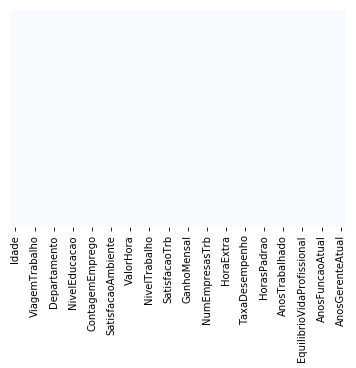

In [10]:
# Verificando a existência de dados missing
sns.heatmap(colaborador_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1387d6f98>,
      dtype=object)

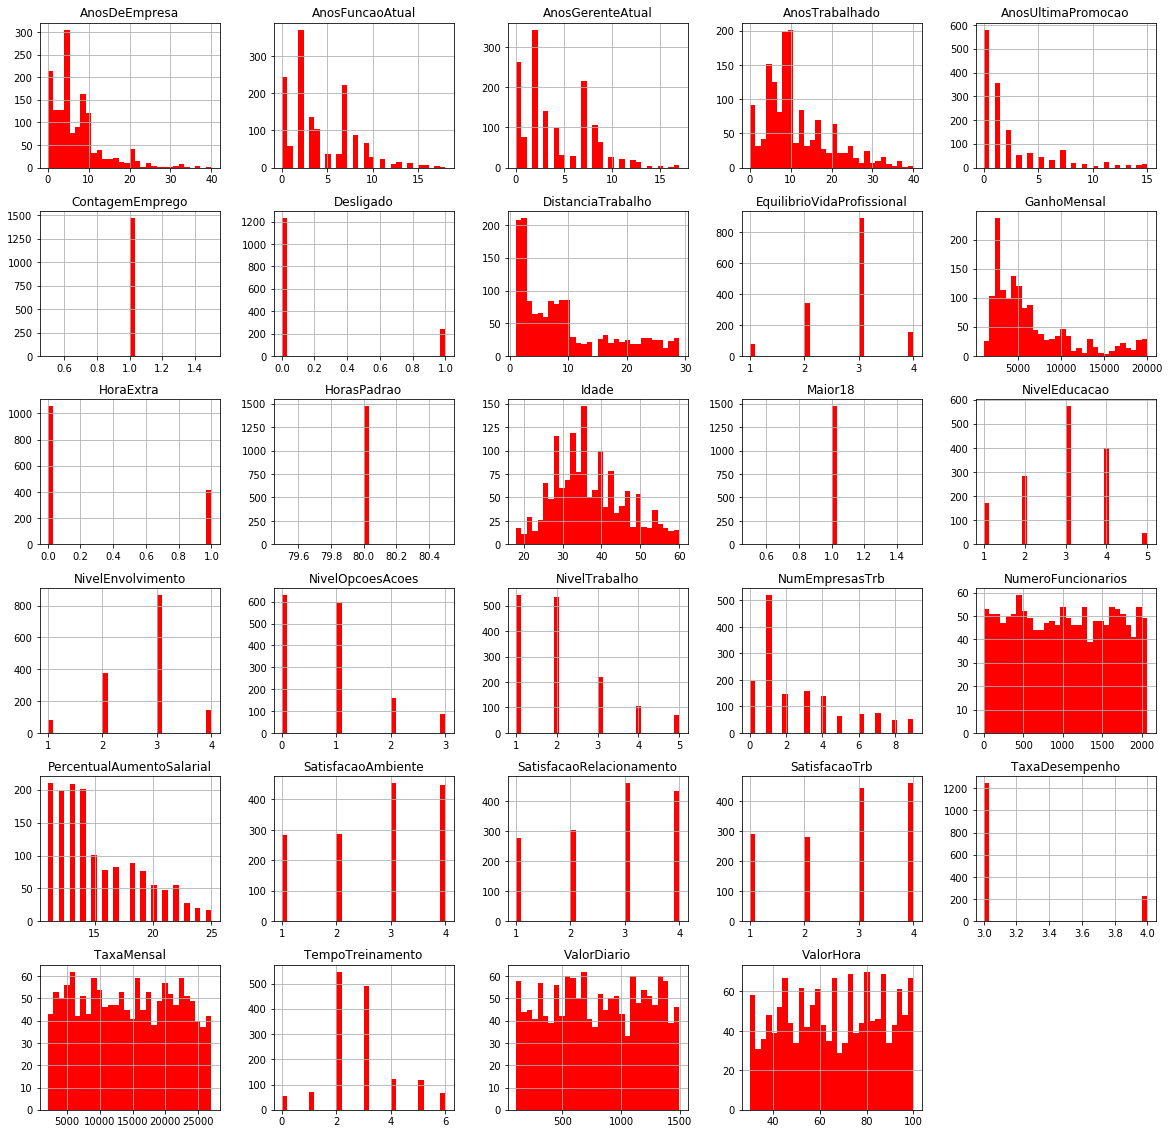

In [11]:
colaborador_df.hist(bins = 30, figsize = (20,20), color = 'r')
# Pode ser descartado 'ContagemEmpregado' e 'HorasPadrao' pois os valores não mudam independente do colaborador

In [12]:
# Pode-se remover 'ContagemEmprego', 'HorasPadrao', 'Maior18' e NumeroFuncionarios pois eles não mudam independente do colaborador
colaborador_df.drop(['ContagemEmprego', 'HorasPadrao', 'Maior18', 'NumeroFuncionarios'], axis=1, inplace=True)

In [13]:
# Separação entre os colaboradores que deixaram a empresa e os que permanecem
sairam_df        = colaborador_df[colaborador_df['Desligado'] == 1]
permanec_df      = colaborador_df[colaborador_df['Desligado'] == 0]

In [14]:
# Contagem do número de colaboradores que deixaram e permanencem na empresa
# Ao que tudo indica parece haver um desbalanceamento no dataset

print("Total =", len(colaborador_df))

print("Número de colaboradores que saíram da empresa =", len(sairam_df))
print("Percentual de colaboradores que saíram da empresa =", 1.*len(sairam_df)/len(colaborador_df)*100.0, "%")
 
print("Número de colaboradores que não saíram da empresa (permanecem) =", len(permanec_df))
print("Percentual de colaboradores que não saíram da empresa (permanecem) =", 1.*len(permanec_df)/len(colaborador_df)*100.0, "%")

Total = 1470
Número de colaboradores que saíram da empresa = 237
Percentual de colaboradores que saíram da empresa = 16.122448979591837 %
Número de colaboradores que não saíram da empresa (permanecem) = 1233
Percentual de colaboradores que não saíram da empresa (permanecem) = 83.87755102040816 %


Vale comparar a média e desvio padrão dos colaboradores que saíram e permanecem na empresa

In [15]:
sairam_df.describe()

,Idade,Desligado,ValorDiario,DistanciaTrabalho,NivelEducacao,SatisfacaoAmbiente,ValorHora,NivelEnvolvimento,NivelTrabalho,SatisfacaoTrb,...,TaxaDesempenho,SatisfacaoRelacionamento,NivelOpcoesAcoes,AnosTrabalhado,TempoTreinamento,EquilibrioVidaProfissional,AnosDeEmpresa,AnosFuncaoAtual,AnosUltimaPromocao,AnosGerenteAtual
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [16]:
permanec_df.describe()

,Idade,Desligado,ValorDiario,DistanciaTrabalho,NivelEducacao,SatisfacaoAmbiente,ValorHora,NivelEnvolvimento,NivelTrabalho,SatisfacaoTrb,...,TaxaDesempenho,SatisfacaoRelacionamento,NivelOpcoesAcoes,AnosTrabalhado,TempoTreinamento,EquilibrioVidaProfissional,AnosDeEmpresa,AnosFuncaoAtual,AnosUltimaPromocao,AnosGerenteAtual
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


Vale destaque para as seguintes features

* Idade: a idade média dos colaboradores que ficaram é maior em comparação aos que deixaram
* ValorDiario: O ganho diário dos colaboradores que ficaram é maior
* DistanciaTrabalho: Colaboradores que ficaram são os que moram mais próximo do trabalho
* SatisfacaoAmbiente' & 'SatisfacaoTrb': Colaboradores que ficaram em média são os que geralmente estão mais satisfeitos com o ambiente de trabalho
* NivelOpcoesAcoes: Os colaboradores que permaneceram tendem a ter um nível mais alto de ações na empresa

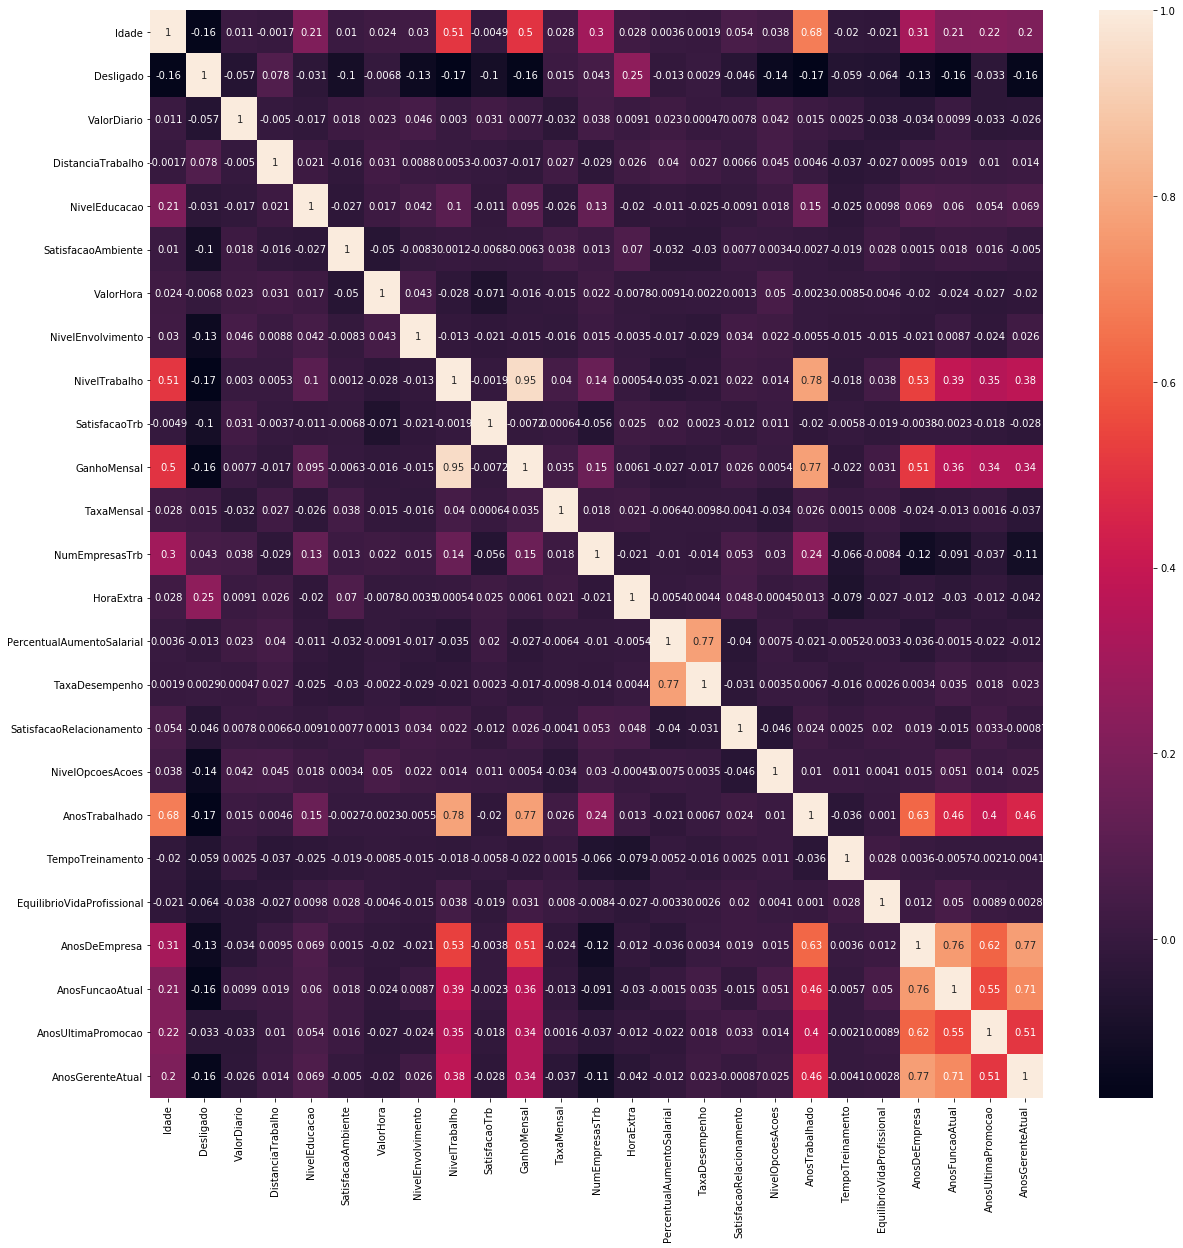

In [17]:
correlacoes = colaborador_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlacoes, annot = True)

Ao visualizar o mapa de calor acima, observa-se que:

* O nível do trabalho está fortemente correlacionado com o total de horas de trabalho
* A renda mensal está fortemente correlacionada com o nível do trabalho, o total de horas de trabalho e a idade

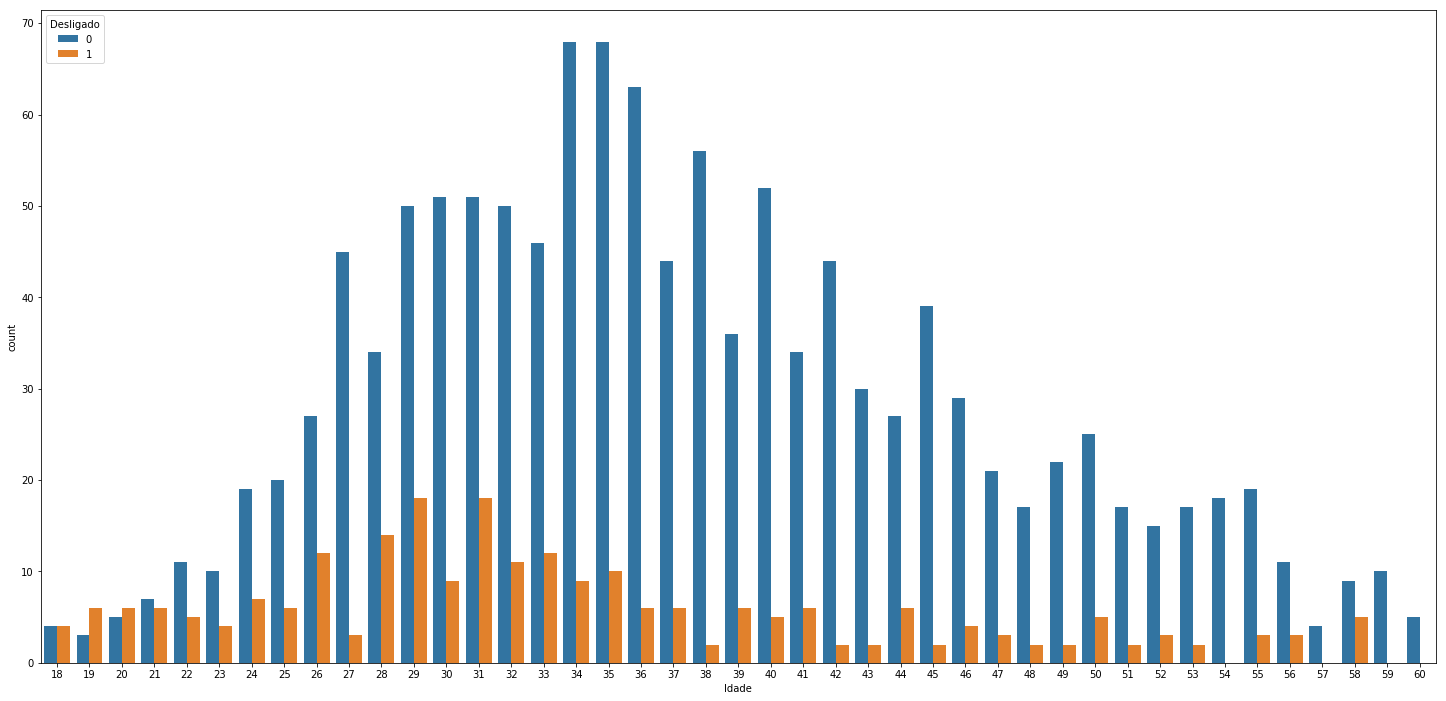

In [18]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'Idade', hue = 'Desligado', data = colaborador_df)

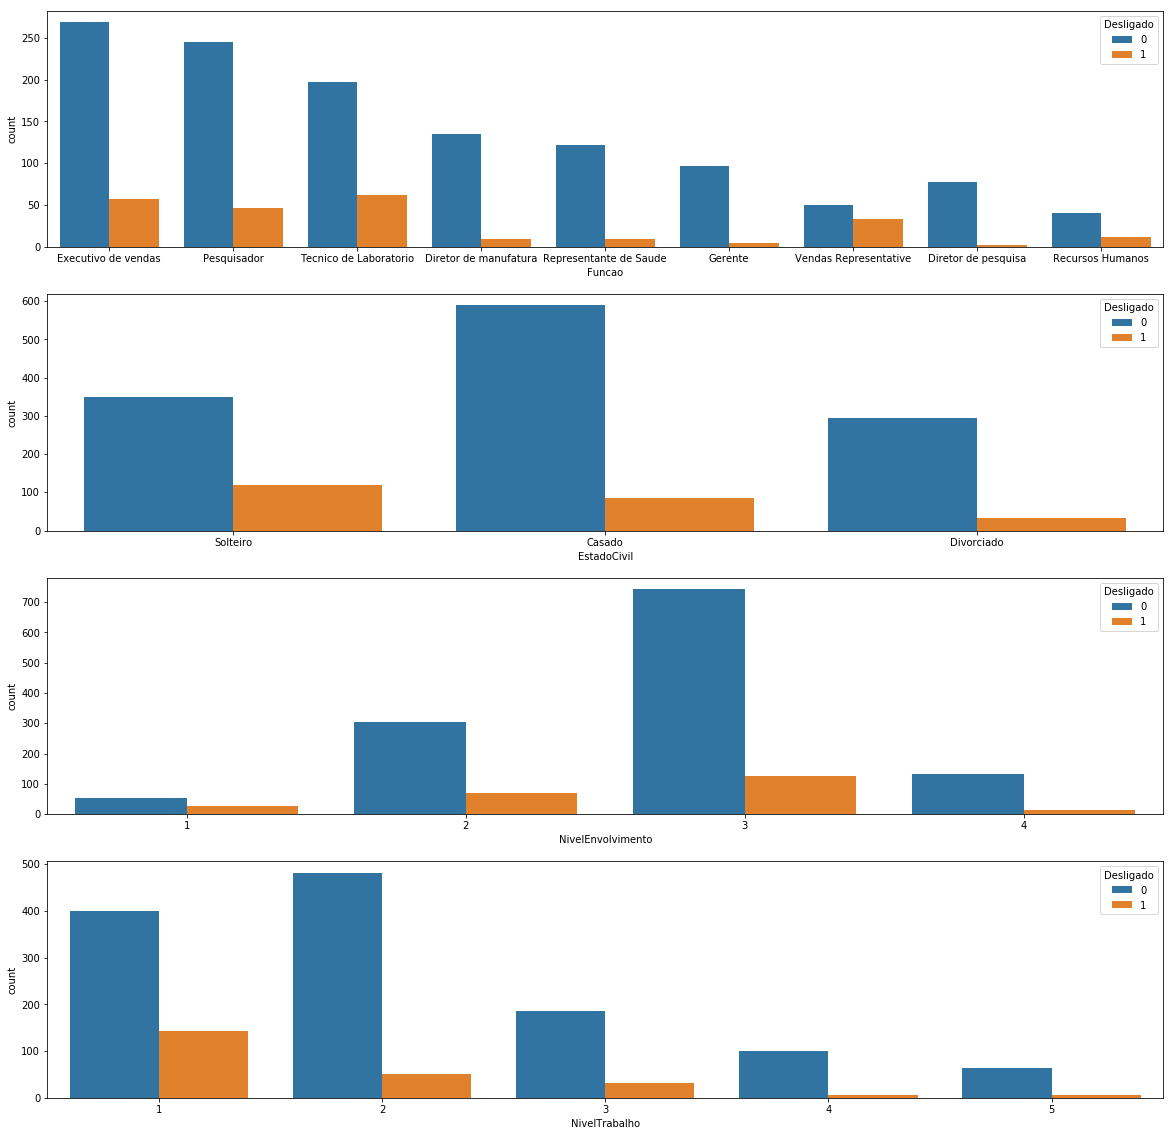

In [19]:
plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'Funcao', hue = 'Desligado', data = colaborador_df)
plt.subplot(412)
sns.countplot(x = 'EstadoCivil', hue = 'Desligado', data = colaborador_df)
plt.subplot(413)
sns.countplot(x = 'NivelEnvolvimento', hue = 'Desligado', data = colaborador_df)
plt.subplot(414)
sns.countplot(x = 'NivelTrabalho', hue = 'Desligado', data = colaborador_df)

Ao plotar as seguintes features nota-se que:

* Colaboradores que são solteiros tendem a deixar a empresa em comparação aos que são casados ou divorciados
* Representantes de vendas tendem a deixar a empresa em comparação as outras funções e cargos
* Colaboradores menos envolvidos com atividades tendem a deixar o quadro em comparação aos que participam de atividades extras da empresa
* Colaboradores com baixa experiência tendem a deixar a empresa com mais frequência

Text(0.5,0,'Distância entre o trabalho e a residência')

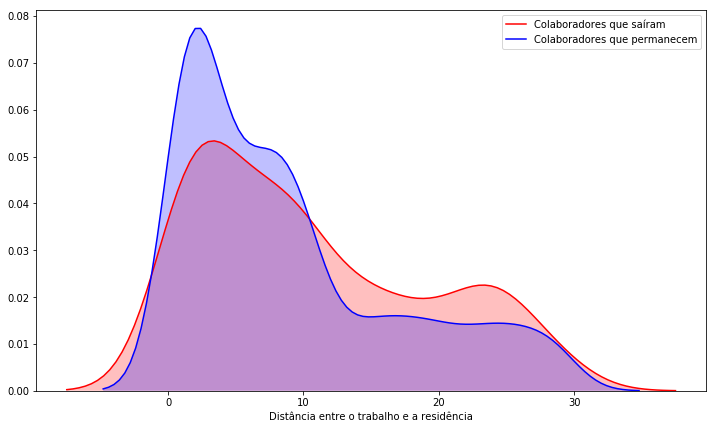

In [20]:
# KDE (Kernel Density Estimate) utilizado para visualizar a função densidade de probabilidades de variáveis contínuas
plt.figure(figsize=(12,7))

sns.kdeplot(sairam_df['DistanciaTrabalho'], label = 'Colaboradores que saíram', shade = True, color = 'r')
sns.kdeplot(permanec_df['DistanciaTrabalho'], label = 'Colaboradores que permanecem', shade = True, color = 'b')

plt.xlabel('Distância entre o trabalho e a residência')

Text(0.5,0,'Total de anos com o mesmo gerente')

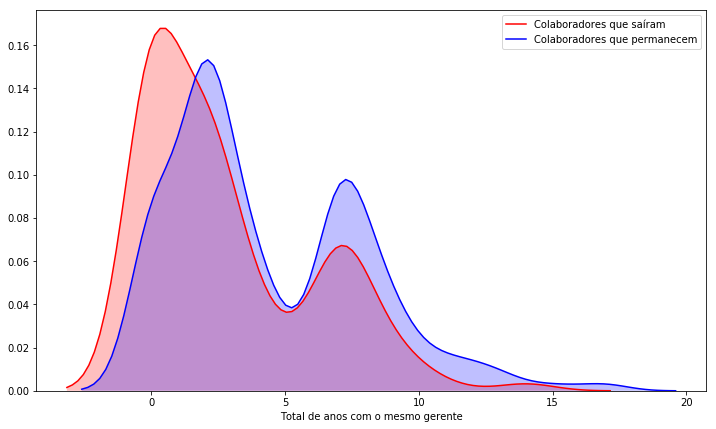

In [21]:
plt.figure(figsize=(12,7))

sns.kdeplot(sairam_df['AnosGerenteAtual'], label = 'Colaboradores que saíram', shade = True, color = 'r')
sns.kdeplot(permanec_df['AnosGerenteAtual'], label = 'Colaboradores que permanecem', shade = True, color = 'b')

plt.xlabel('Total de anos com o mesmo gerente')

Text(0.5,0,'Total de anos trabalhado')

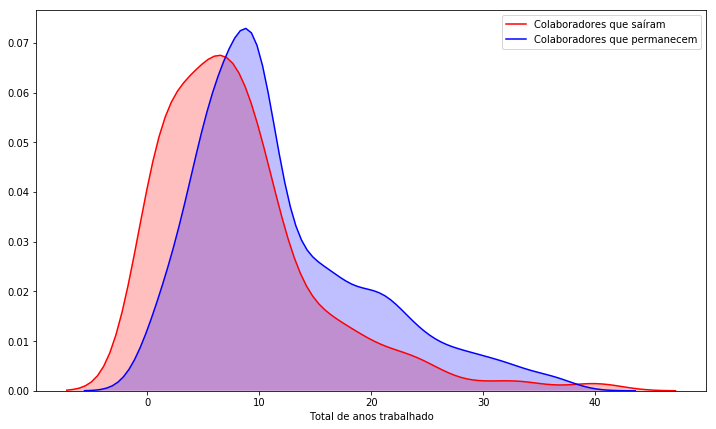

In [22]:
plt.figure(figsize=(12,7))

sns.kdeplot(sairam_df['AnosTrabalhado'], shade = True, label = 'Colaboradores que saíram', color = 'r')
sns.kdeplot(permanec_df['AnosTrabalhado'], shade = True, label = 'Colaboradores que permanecem', color = 'b')

plt.xlabel('Total de anos trabalhado')


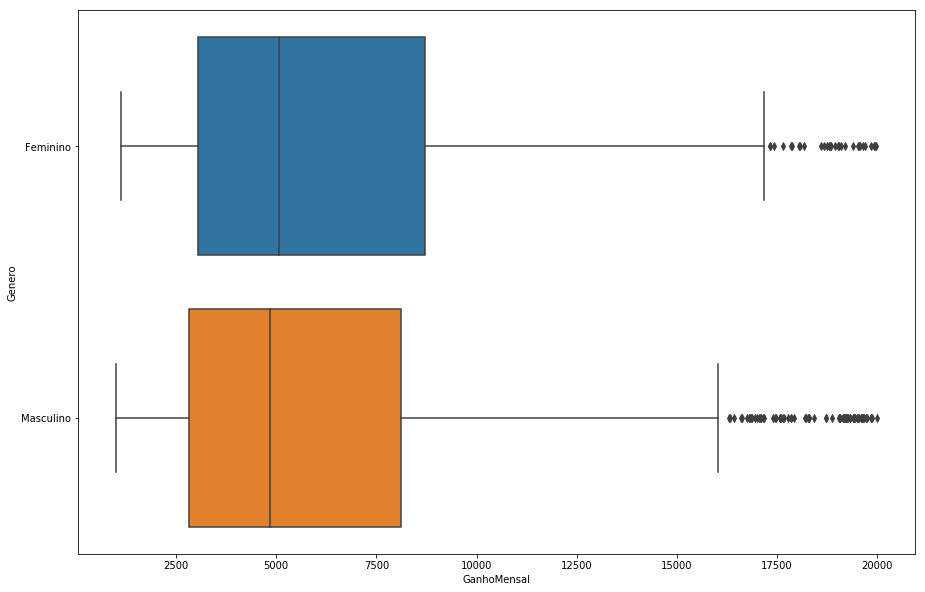

In [23]:
# Visualizacao de Genero vs Ganho mensal
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'GanhoMensal', y = 'Genero', data = colaborador_df)

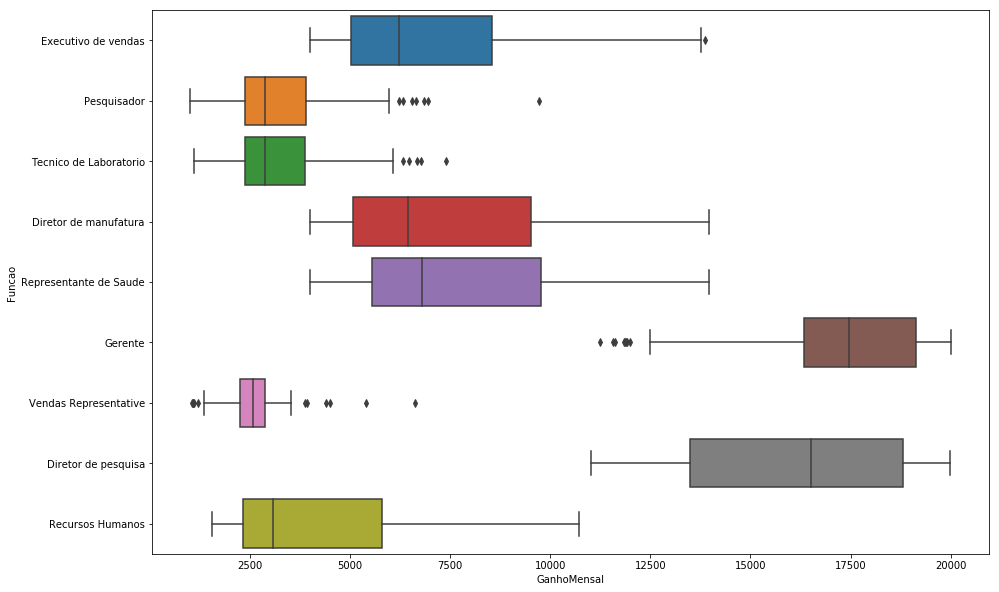

In [24]:
# Visualizacao de Papel desempenhado (Funcao) vs Ganho mensal
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'GanhoMensal', y = 'Funcao', data = colaborador_df)

## Limpeza dos dados

[[ voltar ao topo ]](#Conteúdo)

O próximo passo consiste em lançar uma visão sobre os dados com os quais se pretende trabalhar. Considerando que por mais acurado aparentemente os dados possam se apresentar, erros podem estar contidos, portanto torna-se importante pontuar os erros antes de iniciar o processo de análise.

Por exemplo, as considerações servem para responder as seguintes questões:

* Existe a necessidade de realizar algum tipo de transformação nos dados?
* Existe algo de errado com os dados?
* Existe alguma peculiaridade com os dados?
* Será preciso corrigir ou remover algo relacionado aos dados?
* Será preciso acrescentar mais features para auxiliar na construção do modelo?

A princípio vamos transformar os dados categóricos nominais em sequências numéricas.

In [25]:
colaborador_df.head(3)

,Idade,Desligado,ViagemTrabalho,ValorDiario,Departamento,DistanciaTrabalho,NivelEducacao,AreaEducacao,SatisfacaoAmbiente,Genero,...,TaxaDesempenho,SatisfacaoRelacionamento,NivelOpcoesAcoes,AnosTrabalhado,TempoTreinamento,EquilibrioVidaProfissional,AnosDeEmpresa,AnosFuncaoAtual,AnosUltimaPromocao,AnosGerenteAtual
0,41,1,Raramente,1102,Vendas,1,2,Ciencias da vida,2,Feminino,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Frequentemente,279,Pesquisa & Desenvolvimento,8,1,Ciencias da vida,3,Masculino,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Raramente,1373,Pesquisa & Desenvolvimento,2,2,Outros,4,Masculino,...,3,2,0,7,3,3,0,0,0,0


In [26]:
X_cat = colaborador_df[['ViagemTrabalho', 'Departamento', 'AreaEducacao', 'Genero', 'Funcao', 'EstadoCivil']]
X_cat.head()

,ViagemTrabalho,Departamento,AreaEducacao,Genero,Funcao,EstadoCivil
0,Raramente,Vendas,Ciencias da vida,Feminino,Executivo de vendas,Solteiro
1,Frequentemente,Pesquisa & Desenvolvimento,Ciencias da vida,Masculino,Pesquisador,Casado
2,Raramente,Pesquisa & Desenvolvimento,Outros,Masculino,Tecnico de Laboratorio,Solteiro
3,Frequentemente,Pesquisa & Desenvolvimento,Ciencias da vida,Feminino,Pesquisador,Casado
4,Raramente,Pesquisa & Desenvolvimento,Medico,Masculino,Tecnico de Laboratorio,Casado


In [27]:
from sklearn.preprocessing import LabelEncoder

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforma colunas de X especificadas em self.columns utilizando
        LabelEncoder(). Se nao ha feature especificada, transforma todas
        as colunas em X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [28]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
 
labelencoder = MultiColumnLabelEncoder().fit_transform(X_cat)

X_cat = onehotencoder.fit_transform(labelencoder).toarray()
X_cat

array([[0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [29]:
X_cat.shape

(1470, 26)

In [30]:
X_cat = pd.DataFrame(X_cat)

In [31]:
X_cat.head(10)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [32]:
# neste momento estamos eliminando a feature 'Desligado'
X_numerical = colaborador_df[['Idade', 'ValorDiario', 'DistanciaTrabalho','NivelEducacao', 'SatisfacaoAmbiente', 'ValorHora', 'NivelEnvolvimento', 'NivelTrabalho', 'SatisfacaoTrb', 'GanhoMensal', 'TaxaMensal', 'NumEmpresasTrb','HoraExtra', 'PercentualAumentoSalarial', 'TaxaDesempenho', 'SatisfacaoRelacionamento',	'NivelOpcoesAcoes', 'AnosTrabalhado', 'TempoTreinamento', 'EquilibrioVidaProfissional', 'AnosDeEmpresa' ,'AnosFuncaoAtual', 'AnosUltimaPromocao','AnosGerenteAtual']]
X_numerical.head(10)

,Idade,ValorDiario,DistanciaTrabalho,NivelEducacao,SatisfacaoAmbiente,ValorHora,NivelEnvolvimento,NivelTrabalho,SatisfacaoTrb,GanhoMensal,...,TaxaDesempenho,SatisfacaoRelacionamento,NivelOpcoesAcoes,AnosTrabalhado,TempoTreinamento,EquilibrioVidaProfissional,AnosDeEmpresa,AnosFuncaoAtual,AnosUltimaPromocao,AnosGerenteAtual
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
5,32,1005,2,2,4,79,3,1,4,3068,...,3,3,0,8,2,2,7,7,3,6
6,59,1324,3,3,3,81,4,1,1,2670,...,4,1,3,12,3,2,1,0,0,0
7,30,1358,24,1,4,67,3,1,3,2693,...,4,2,1,1,2,3,1,0,0,0
8,38,216,23,3,4,44,2,3,3,9526,...,4,2,0,10,2,3,9,7,1,8
9,36,1299,27,3,3,94,3,2,3,5237,...,3,2,2,17,3,2,7,7,7,7


In [33]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all.head(10)

,0,1,2,3,4,5,6,7,8,9,...,TaxaDesempenho,SatisfacaoRelacionamento,NivelOpcoesAcoes,AnosTrabalhado,TempoTreinamento,EquilibrioVidaProfissional,AnosDeEmpresa,AnosFuncaoAtual,AnosUltimaPromocao,AnosGerenteAtual
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3,2,0,7,3,3,0,0,0,0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,4,1,6,3,3,2,2,2,2
5,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3,3,0,8,2,2,7,7,3,6
6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,4,1,3,12,3,2,1,0,0,0
7,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4,2,1,1,2,3,1,0,0,0
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,4,2,0,10,2,3,9,7,1,8
9,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,3,2,2,17,3,2,7,7,7,7


In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_all)

In [35]:
X

array([[0.        , 1.        , 0.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [1.        , 0.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [1.        , 0.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 1.        , 0.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [36]:
y = colaborador_df['Desligado']
y.head(10)

0    1
1    0
2    1
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Desligado, dtype: int64

## Criação do modelo

[[ voltar ao topo ]](#Conteúdo)



Após assegurar que os dados estejam limpos e embuído com algum conhecimento - mesmo que superficial sobre suas distribuições e relacionamentos, chegou o momento de dar o próximo passo iniciando o processo de criação dos modelos de machine learning.


Nesta seção, exploramos usando modelos de técnicas de regressão logística, random forest e deep learning para prever as de chances de  ocorrências de saída por parte dos colaboradores.


Após assegurar que os dados estejam limpos e embuído com algum conhecimento mesmo que superficial sobre suas distribuições e relacionamentos, chegou o momento de dar o próximo passo na análise dividindo os dados nos sets de treinamento e teste.

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [38]:
X_train.shape

(1102, 50)

In [39]:
X_test.shape

(368, 50)

#### Regressão Logística

Algoritmo de Regressão Logística utiizado para prever a probabiliade de um colaborador deixar a empresa. Sob essa abordagem, prevemos a acurácia  durante a janela de previsão. Exploramos usando uma variedade de features e formas funcionais

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [41]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [42]:
from sklearn.metrics import confusion_matrix, classification_report

print("Acuracia {} %".format( 100 * accuracy_score(y_pred, y_test)))


Acuracia 88.04347826086956 %


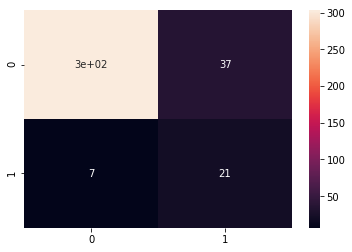

In [43]:
# Avaliando o desempenho como um todo
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)


In [44]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      0.98      0.93       310
          1       0.75      0.36      0.49        58

avg / total       0.87      0.88      0.86       368



#### Random Forest

Uma outra abordagem relevante para prever se algum colaborador tem chance de deixar a empresa é utilizando classificadors binários com o método Random Forest. 

In [45]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)


/Users/danilogustavo/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [46]:
y_pred = model.predict(X_test)

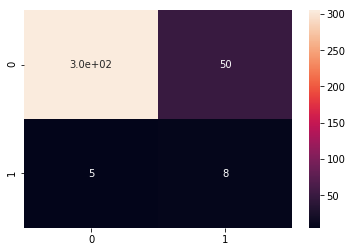

In [47]:
# Avaliando o desempenho como um todo
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

In [48]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.86      0.98      0.92       310
          1       0.62      0.14      0.23        58

avg / total       0.82      0.85      0.81       368



#### Deep Learning

Para tentar melhorar o poder de previsão testamos a implementação em deep learning.

In [49]:
import tensorflow as tf

In [50]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=500, activation='relu', input_shape=(50, )))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=500, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))


Instructions for updating:
Colocations handled automatically by placer.


In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               25500     
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 501       
Total params: 527,001
Trainable params: 527,001
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [53]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size = 50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1102/1102 [==============================] - 2s 2ms/sample - loss: 0.4457 - acc: 0.8140
Epoch 2/100
1102/1102 [==============================] - 1s 739us/sample - loss: 0.3209 - acc: 0.8639
Epoch 3/100
1102/1102 [==============================] - 1s 627us/sample - loss: 0.2909 - acc: 0.8848
Epoch 4/100
1102/1102 [==============================] - 1s 735us/sample - loss: 0.2657 - acc: 0.8956
Epoch 5/100
1102/1102 [==============================] - 1s 727us/sample - loss: 0.2436 - acc: 0.8993
Epoch 6/100
1102/1102 [==============================] - 1s 746us/sample - loss: 0.2117 - acc: 0.9120
Epoch 7/100
1102/1102 [==============================] - 1s 691us/sample - loss: 0.1762 - acc: 0.9356
Epoch 8/100
1102/1102 [==============================] - 1s 884us/sample - loss: 0.1734 - acc: 0.9292
Epoch 9/100
1102/1102 [==============================] - 1s 692us/sample - loss: 0.1639 - acc: 0.9401
Epoch 10/100
1102/1102 [============

1102/1102 [==============================] - 1s 958us/sample - loss: 8.0519e-06 - acc: 1.0000
Epoch 77/100
1102/1102 [==============================] - 1s 934us/sample - loss: 7.6593e-06 - acc: 1.0000
Epoch 78/100
1102/1102 [==============================] - 1s 927us/sample - loss: 7.3145e-06 - acc: 1.0000
Epoch 79/100
1102/1102 [==============================] - 1s 936us/sample - loss: 7.0973e-06 - acc: 1.0000
Epoch 80/100
1102/1102 [==============================] - 1s 1ms/sample - loss: 6.7491e-06 - acc: 1.0000
Epoch 81/100
1102/1102 [==============================] - 1s 842us/sample - loss: 6.4183e-06 - acc: 1.0000
Epoch 82/100
1102/1102 [==============================] - 1s 940us/sample - loss: 6.1076e-06 - acc: 1.0000
Epoch 83/100
1102/1102 [==============================] - 1s 704us/sample - loss: 5.8820e-06 - acc: 1.0000
Epoch 84/100
1102/1102 [==============================] - 1s 921us/sample - loss: 5.6479e-06 - acc: 1.0000
Epoch 85/100
1102/1102 [============================

In [54]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


In [55]:
y_pred

array([[False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [56]:
epochs_hist.history.keys()

dict_keys(['loss', 'acc'])

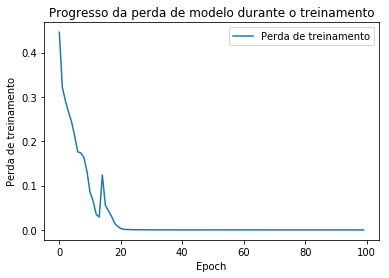

In [57]:
plt.plot(epochs_hist.history['loss'])
plt.title('Progresso da perda de modelo durante o treinamento')
plt.xlabel('Epoch')
plt.ylabel('Perda de treinamento')
plt.legend(['Perda de treinamento'])

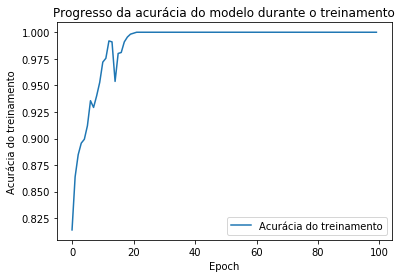

In [59]:
plt.plot(epochs_hist.history['acc'])
plt.title('Progresso da acurácia do modelo durante o treinamento')
plt.xlabel('Epoch')
plt.ylabel('Acurácia do treinamento')
plt.legend(['Acurácia do treinamento'])

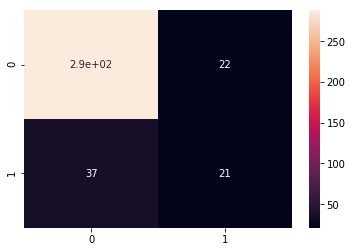

In [60]:
# Avaliando o desempenho como um todo
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


In [61]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.89      0.93      0.91       310
          1       0.49      0.36      0.42        58

avg / total       0.82      0.84      0.83       368

